In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebrau
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv
/kaggle/input/mobile-phone-price/Mobile phone price.csv


Goal : Menggunakan informasi ini untuk memprediksi biaya untuk pelanggan baru

In [2]:
import pandas as pd
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(insurance.shape)

(1338, 7)


In [6]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

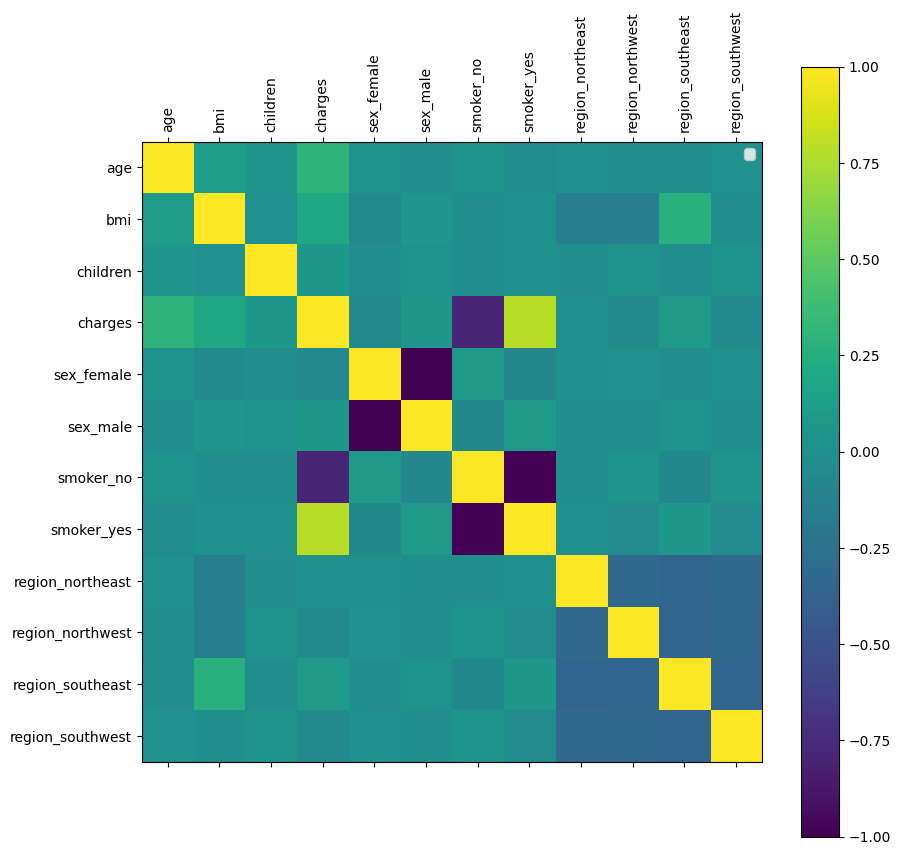

In [9]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):
    # Convert categorical columns to numerical using one-hot encoding
    df_encoded = pd.get_dummies(df)
    
    corr = df_encoded.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),  corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(insurance)

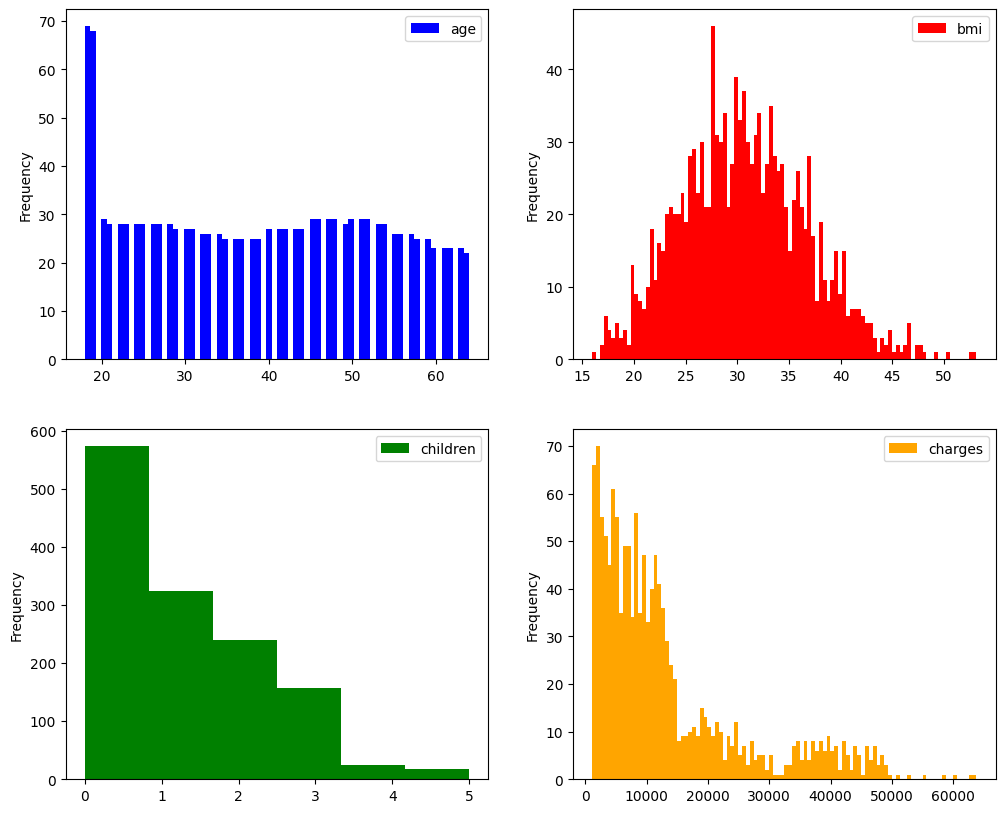

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind='hist', y='age', bins=70, color='b', ax=axes[0][0])
insurance.plot(kind='hist', y='bmi', bins=100, color='r', ax=axes[0][1])
insurance.plot(kind='hist', y='children', bins=6, color='g', ax=axes[1][0])
insurance.plot(kind='hist', y='charges', bins=100, color='Orange', ax=axes[1][1])
plt.show()

<Axes: xlabel='sex'>

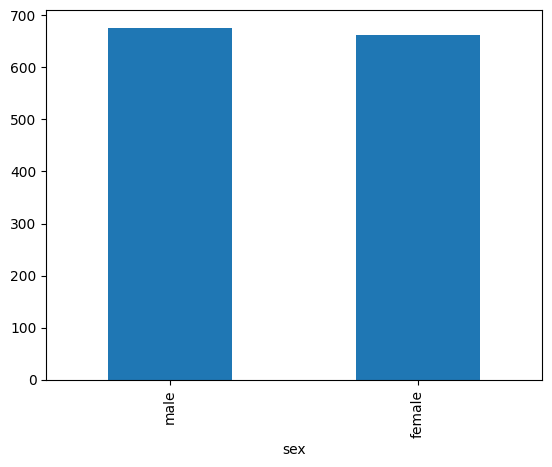

In [11]:
insurance['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

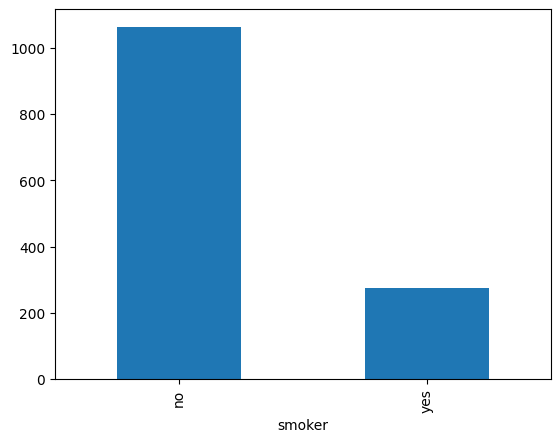

In [12]:
insurance['smoker'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Children vs charges'}, xlabel='children', ylabel='charges'>

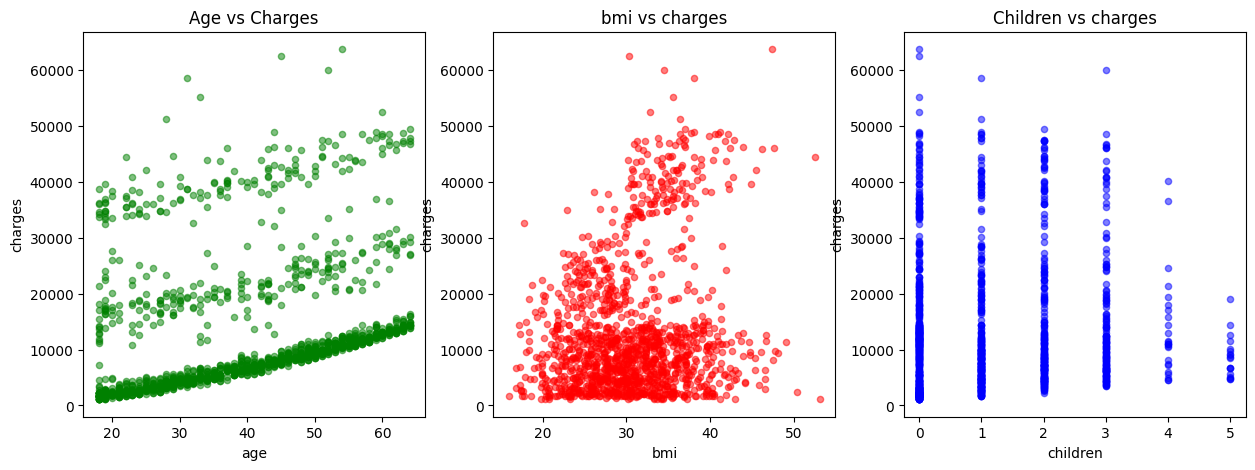

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title='Age vs Charges')
insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title='bmi vs charges')
insurance.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title='Children vs charges')

<Axes: xlabel='bmi', ylabel='charges'>

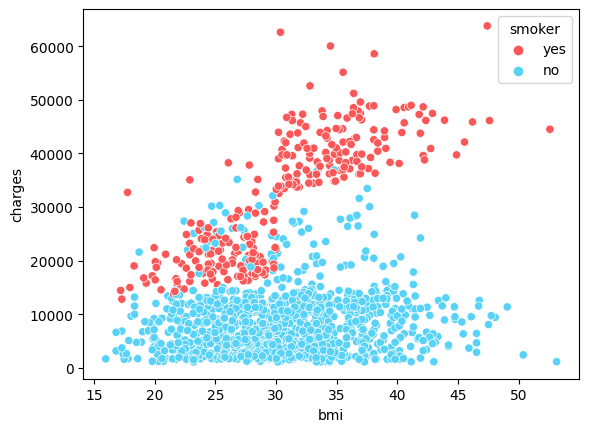

In [14]:
import seaborn as sns
pal = ['#FA5858', '#58D3F7']
sns.scatterplot(x='bmi', y='charges', data=insurance, palette=pal, hue='smoker')

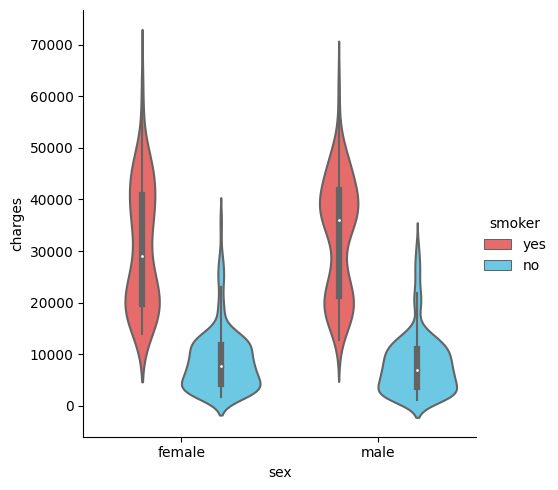

In [15]:
pal = ['#FA5858', '#58D3F7']
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=insurance, palette=pal)